In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data_path = join('./data', 'train.csv')
test_data_path = join('./data', 'test.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
print('train data dim : {}'.format(train.shape))
print('test data dim : {}'.format(test.shape))

train data dim : (15035, 21)
test data dim : (6468, 20)


In [3]:
train.info()
#연속형 변수 : price, sqft_above, sqft_basement, sqft_living, sqft_lot ...
#순서형 변수 : waterfront, view, condition, grade, year, yr_built, yr_renovated...
#위치 관련 변수 : zipcode, lat, long

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [4]:
# 데이터 전처리
## 결측치 확인 -> 없음
## 중복 데이터 확인 -> 없음

print(train.isnull().sum().values.sum())
train[train.duplicated()]

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [5]:
# 데이터 전처리
## date -> year, month, day로 분리가능 -> year, month까지 추가


train['year'] = train['date'].apply(lambda x : str(x[:4])).astype(int)
train['month'] = train['date'].apply(lambda x : str(x[4:6])).astype(int)

# train["price"] = train["price"].map(lambda i:np.log(i) if i>0 else 0)

del train['date']
del train['id']

test['year'] = test['date'].apply(lambda x : str(x[:4])).astype(int)
test['month'] = test['date'].apply(lambda x : str(x[4:6])).astype(int)

del test['date']

In [6]:
# 데이터 전처리
##yr_renovated - 재건축 년도 ; 0의 경우 재건축 X => 0 , 1 로 categorical 변수로 처리하는게 적절하다고 생각

print(train['yr_renovated'].value_counts())

train['yr_renovated'] = train['yr_renovated'].apply(lambda x: 1 if x == 0 else 0)
test['yr_renovated'] = test['yr_renovated'].apply(lambda x: 1 if x == 0 else 0)

print(train['yr_renovated'].value_counts())
print(train.columns)

0       14404
2014       71
2013       28
2007       25
2003       25
        ...  
1940        1
1950        1
1954        1
1948        1
1944        1
Name: yr_renovated, Length: 65, dtype: int64
1    14404
0      631
Name: yr_renovated, dtype: int64
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')


<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

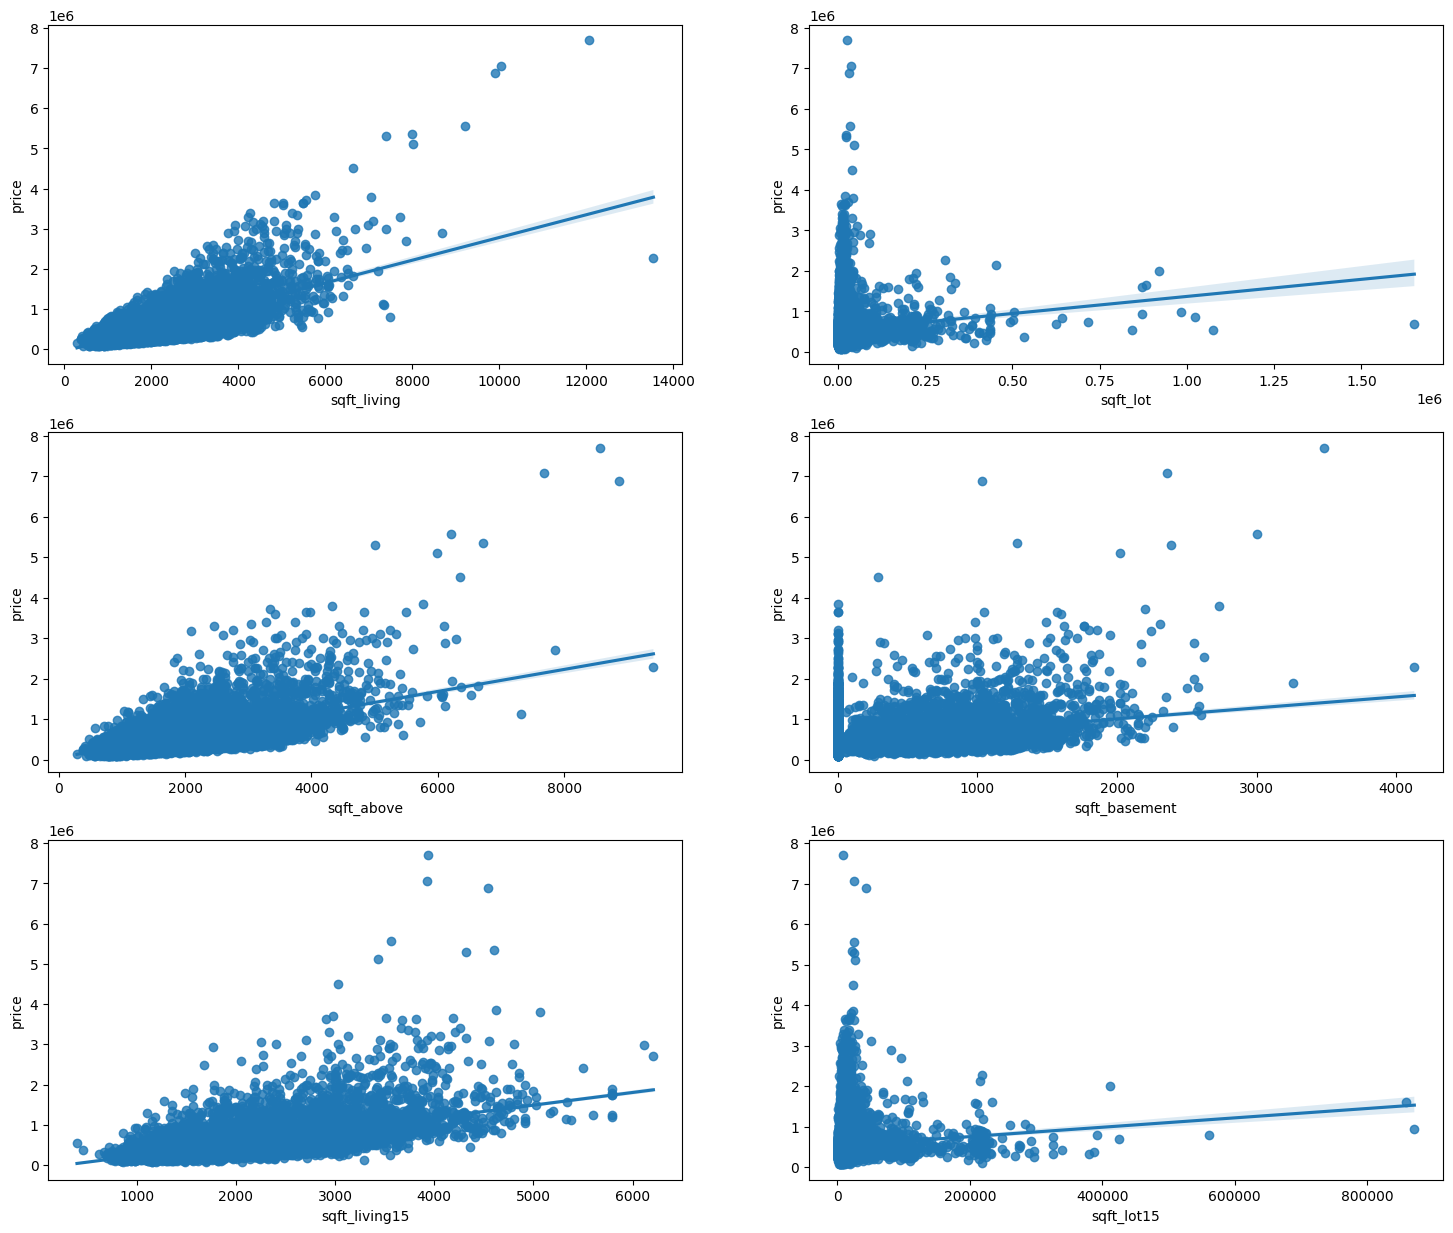

In [7]:
#EDA
#sqft 살펴보기
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(18,15))

sqft_living_scatter_plot = pd.concat([train['price'],train['sqft_living']],axis = 1)
sns.regplot(x='sqft_living',y = 'price',data = sqft_living_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

sqft_lot_scatter_plot = pd.concat([train['price'],train['sqft_lot']],axis = 1)
sns.regplot(x='sqft_lot',y = 'price',data = sqft_lot_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

sqft_above_scatter_plot = pd.concat([train['price'],train['sqft_above']],axis = 1)
sns.regplot(x='sqft_above',y = 'price',data = sqft_above_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

sqft_basement_scatter_plot = pd.concat([train['price'],train['sqft_basement']],axis = 1)
sns.regplot(x='sqft_basement',y = 'price',data = sqft_basement_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

sqft_living15_scatter_plot = pd.concat([train['price'],train['sqft_living15']],axis = 1)
sns.regplot(x='sqft_living15',y = 'price',data = sqft_living15_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

sqft_lot15_scatter_plot = pd.concat([train['price'],train['sqft_lot15']],axis = 1)
sns.regplot(x='sqft_lot15',y = 'price',data = sqft_lot15_scatter_plot,scatter= True, fit_reg=True, ax=ax6)


# sqft_living, sqft_above, sqft_living15는 어느정도 이상치가 있어보인다.
# basement와와 sqft_lot15의 경우 0이 많으므로 MinMaxScaler를 사용할 경우 drop해야함

        price                                                               \
        count          mean           std        min        25%        50%   
grade                                                                        
1         1.0  1.420000e+05           NaN   142000.0   142000.0   142000.0   
3         2.0  2.710000e+05  1.272792e+04   262000.0   266500.0   271000.0   
4        23.0  2.097413e+05  9.610089e+04    80000.0   145000.0   200000.0   
5       174.0  2.510696e+05  1.248287e+05    78000.0   172375.0   227475.0   
6      1406.0  3.001554e+05  1.210734e+05    84000.0   215000.0   274600.0   
7      6228.0  4.015281e+05  1.538019e+05    90000.0   285000.0   375000.0   
8      4207.0  5.423156e+05  2.146832e+05   140000.0   390000.0   512500.0   
9      1855.0  7.734781e+05  3.158378e+05   230000.0   570500.0   725000.0   
10      781.0  1.062482e+06  4.710331e+05   316000.0   767450.0   908990.0   
11      288.0  1.522459e+06  7.345273e+05   550000.0  1036500.0 

<AxesSubplot:xlabel='grade', ylabel='price'>

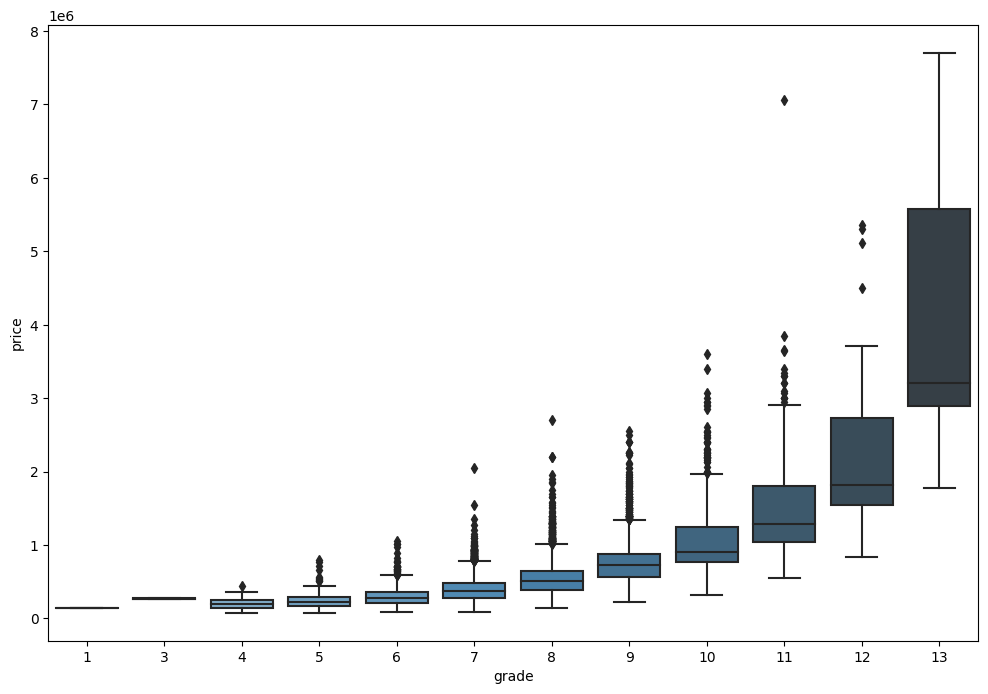

In [8]:
#EDA
#grade와 price의 관계 관찰
print(train[["grade", "price"]].groupby(["grade"], as_index = True).describe())
fig, ax = plt.subplots(figsize = (12, 8))

sns.boxplot(x = train["grade"], y = train["price"], data = train, ax = ax, palette = "Blues_d")
# 3의 경우 4보다 평균이 높아 이상치처리 -> 다른 핵심 변수와 price와의 관계를 확인 후 판단
# 11의 경우 눈에 띄는 이상치 확인 -> 다른 핵심 변수와 price와의 관계를 확인 후 판단

           price                                                             \
           count          mean            std       min       25%       50%   
bedrooms                                                                      
0            4.0  2.405000e+05   74505.033387  142000.0  211750.0  250000.0   
1          133.0  3.102892e+05  130347.761527   80000.0  229000.0  293000.0   
2         1931.0  3.992137e+05  194900.840176   78000.0  265000.0  370000.0   
3         6835.0  4.657418e+05  261322.681915   89000.0  298850.0  413450.0   
4         4797.0  6.340614e+05  382654.331315  100000.0  375000.0  549995.0   
5         1108.0  8.022583e+05  618801.129768  133000.0  439937.5  625000.0   
6          188.0  8.714031e+05  914632.397633  230000.0  433750.0  664500.0   
7           22.0  9.669480e+05  735405.765394  280000.0  539250.0  740000.0   
8           10.0  1.135300e+06  921998.318870  340000.0  601250.0  754000.0   
9            5.0  7.927998e+05  324267.322437  45000

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

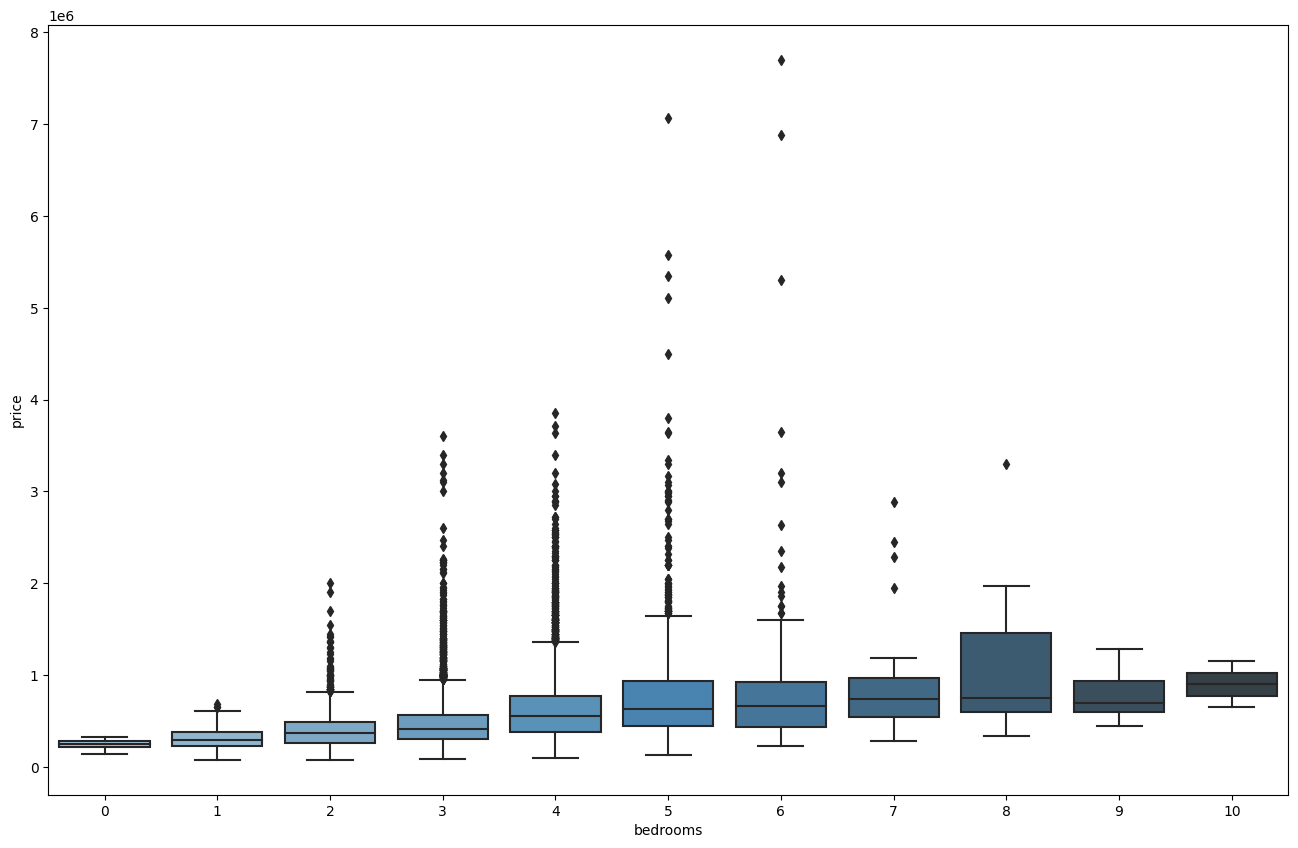

In [9]:
#EDA
#방 수와 가격의 관계 관찰
print(train[["bedrooms", "price"]].groupby(["bedrooms"], as_index = True).describe())

fig, ax = plt.subplots(figsize = (16, 10))

sns.boxplot(x = train["bedrooms"], y = train["price"], data = train, ax = ax, palette = "Blues_d")

# boxplot을 살펴보면 방의 수에 따른 가격이 대략적인 선형관계가 있지만 다른 요소들에 영향을 받는듯한 모습

            price                                                    \
            count          mean           std        min        25%   
bathrooms                                                             
0.00          4.0  2.852500e+05  1.444239e+05   142000.0   211750.0   
0.50          3.0  2.123333e+05  8.994072e+04   109000.0   182000.0   
0.75         45.0  2.812389e+05  1.360876e+05    80000.0   190000.0   
1.00       2675.0  3.469929e+05  1.550331e+05    78000.0   230000.0   
1.25          5.0  6.082900e+05  4.511401e+05   275000.0   321950.0   
1.50       1009.0  4.052911e+05  1.848993e+05   107000.0   268000.0   
1.75       2112.0  4.516214e+05  1.954409e+05   137900.0   310000.0   
2.00       1357.0  4.628095e+05  2.075399e+05   133000.0   310000.0   
2.25       1433.0  5.309718e+05  2.758159e+05   160000.0   336750.0   
2.50       3748.0  5.558889e+05  2.691441e+05   153503.0   364997.0   
2.75        843.0  6.632313e+05  3.027376e+05   183750.0   449725.0   
3.00  

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

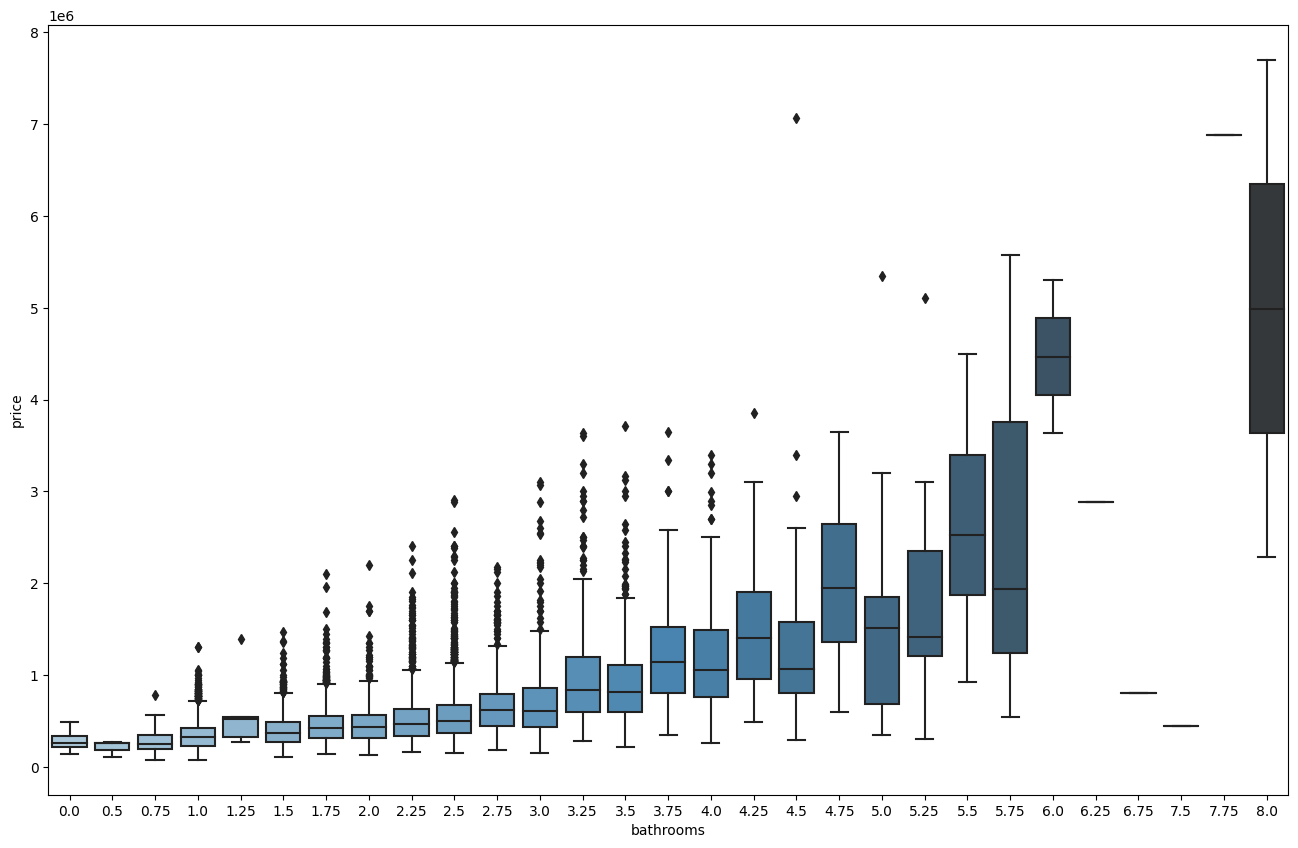

In [10]:
#EDA
#욕실 수와 가격의 관계 관찰하기
print(train[["bathrooms", "price"]].groupby(["bathrooms"], as_index = True).describe())

fig, ax = plt.subplots(figsize = (16, 10))

sns.boxplot(x = train["bathrooms"], y = train["price"], data = train, ax = ax, palette = "Blues_d")
#방 수와 마찬가지로 대략적인 선형관계가 보이지만 좀 더 연관성이 높은 건 방 수 인것을 알 수 있음

In [11]:
#EDA

train[["floors", "price"]].groupby(["floors"], as_index = True).describe()
# floors, price는 선형관계로 보임

price                                                            \
         count          mean           std       min       25%       50%   
floors                                                                     
1.0     7361.0  4.396829e+05  2.594990e+05   78000.0  275000.0  389000.0   
1.5     1330.0  5.577378e+05  3.116443e+05  123000.0  350000.0  525000.0   
2.0     5810.0  6.503442e+05  4.391244e+05   90000.0  379500.0  545900.0   
2.5      113.0  1.022214e+06  8.995638e+05  255000.0  542500.0  750000.0   
3.0      417.0  6.045992e+05  3.759388e+05  208400.0  385000.0  500000.0   
3.5        4.0  1.184750e+06  1.410645e+06  435000.0  468000.0  502000.0   

                              
              75%        max  
floors                        
1.0      525000.0  3800000.0  
1.5      690000.0  3650000.0  
2.0      775000.0  7062500.0  
2.5     1225000.0  7700000.0  
3.0      640000.0  3100000.0  
3.5     1218750.0  3300000.0

In [12]:
train[["waterfront", "price"]].groupby(["waterfront"], as_index = True).describe()
# waterfront, price는 선형관계로 보임

price                                                  \
              count          mean           std       min       25%   
waterfront                                                            
0           14928.0  5.323243e+05  3.452737e+05   78000.0  320000.0   
1             107.0  1.706784e+06  1.186021e+06  285000.0  780000.0   

                                             
                  50%        75%        max  
waterfront                                   
0            450000.0   640000.0  7700000.0  
1           1517000.0  2215000.0  7062500.0

In [13]:
train[["view", "price"]].groupby(["view"], as_index = True).describe()
# view, price는 선형관계로 보임

price                                                             \
        count          mean           std       min       25%        50%   
view                                                                       
0     13548.0  4.962857e+05  2.844006e+05   78000.0  311000.0   433000.0   
1       241.0  7.872060e+05  5.083995e+05  217000.0  480000.0   670000.0   
2       665.0  8.056546e+05  5.437523e+05  169317.0  485000.0   680000.0   
3       373.0  9.866276e+05  6.457858e+05  154000.0  560000.0   800000.0   
4       208.0  1.499979e+06  1.012712e+06  252000.0  817500.0  1187500.0   

                            
            75%        max  
view                        
0      600000.0  5570000.0  
1      875000.0  3650000.0  
2      950000.0  7062500.0  
3     1298000.0  7700000.0  
4     1899250.0  6885000.0

In [14]:
train[["condition", "price"]].groupby(["condition"], as_index = True).describe()
# condition, price는 선형관계로 보임

price                                                              \
            count           mean            std       min       25%       50%   
condition                                                                       
1            21.0  276592.857143  171129.508184   78000.0  130000.0  252000.0   
2           110.0  325228.945455  272459.077436   80000.0  188250.0  279000.0   
3          9793.0  541062.528337  365380.221604   83000.0  329950.0  450000.0   
4          3956.0  526107.457533  371959.694139   89000.0  305000.0  445000.0   
5          1155.0  612704.427706  414868.804032  110000.0  350000.0  525000.0   

                                
                75%        max  
condition                       
1          380000.0   658000.0  
2          391050.0  2555000.0  
3          640000.0  7062500.0  
4          635000.0  7700000.0  
5          725000.0  3650000.0

<AxesSubplot:xlabel='month', ylabel='price'>

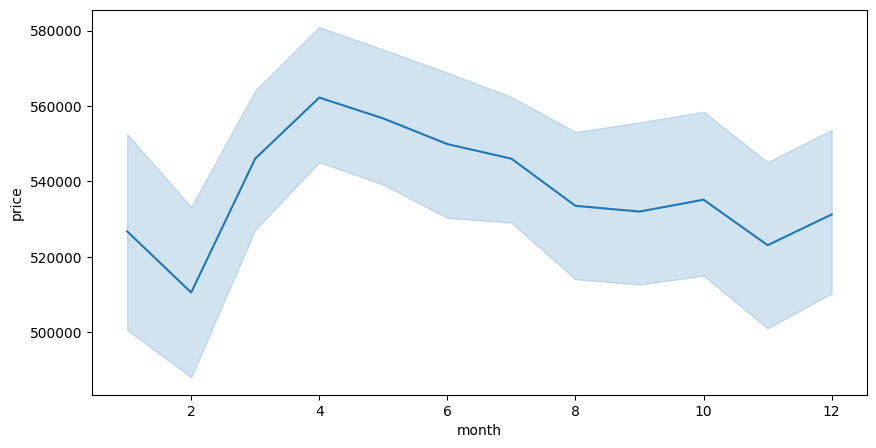

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x=train['month'], y=train['price'])
#month에 따른 가격 패턴이 있는 것 같기도 함

In [16]:
# 데이터 전처리
## 이상치 처리

#grade 3 삭제 (sqft수치가 낮은데 price가 높음)
#grade 11 유지 (sqft수치가 엄청 높고 price가 높음)
display(train.loc[train.grade==3])
display(train.loc[train.grade==4].head())
display(train.loc[(train.grade==11) & (train.price>15.5)])
display(train.loc[train.grade==12].head())
train.drop([2302,4123], axis=0, inplace=True)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
2302,262000.0,1,0.75,520,12981,1.0,0,0,5,3,...,0,1920,1,98022,47.2082,-121.995,1340,12233,2015,2
4123,280000.0,1,0.00,600,24501,1.0,0,0,2,3,...,0,1950,1,98045,47.5316,-121.749,990,22549,2014,11


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
246,299000.0,1,0.75,560,12120,1.0,0,0,3,4,...,0,1967,1,98014,47.6750,-121.854,1300,19207,2014,6
339,80000.0,1,0.75,430,5050,1.0,0,0,2,4,...,0,1912,1,98014,47.6499,-121.909,1200,7500,2014,5
774,140000.0,1,1.00,730,6890,1.0,0,0,4,4,...,0,1926,1,98055,47.4670,-122.215,1790,7969,2014,11
2753,248000.0,2,1.00,770,8600,1.0,0,0,4,4,...,0,1914,1,98027,47.5325,-122.031,1420,6960,2015,4
3698,352000.0,2,0.75,760,33801,1.0,0,0,4,4,...,0,1931,1,98059,47.4703,-122.076,1100,39504,2014,10


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
47,1040000.0,5,3.25,4770,50094,1.0,0,0,4,11,...,1700,1973,1,98005,47.6525,-122.160,3530,38917,2014,9
191,2900000.0,4,3.25,5050,20100,1.5,0,2,3,11,...,300,1982,0,98004,47.6312,-122.223,3890,20060,2015,5
192,1365000.0,4,4.75,5310,57346,2.0,0,0,4,11,...,0,1989,1,98077,47.7285,-122.042,4180,47443,2014,10
222,1384000.0,4,3.25,4290,12103,1.0,0,3,3,11,...,1600,1997,1,98006,47.5503,-122.102,3860,11244,2014,6
275,1350000.0,5,3.50,4800,14984,2.0,0,2,3,11,...,1320,1998,1,98006,47.5543,-122.148,4050,19009,2014,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,1325000.0,4,4.00,4420,16526,2.0,0,0,3,11,...,0,2013,1,98075,47.5914,-122.027,3510,50447,2014,6
14988,1057000.0,2,1.50,2370,184231,2.0,0,0,3,11,...,0,2005,1,98045,47.4543,-121.778,3860,151081,2014,8
14990,1375000.0,5,4.50,4350,13405,2.0,0,0,3,11,...,0,2014,1,98074,47.6018,-122.060,3990,7208,2014,12
15021,1222500.0,4,3.50,4910,9444,1.5,0,0,3,11,...,1800,2007,1,98074,47.6502,-122.066,4560,11063,2014,5


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
98,2250000.0,4,3.25,5180,19850,2.0,0,3,3,12,...,1640,2006,1,98006,47.5620,-122.162,3160,9750,2015,4
300,1550000.0,5,4.25,6070,171626,2.0,0,0,3,12,...,0,1999,1,98024,47.5954,-121.950,4680,211267,2014,7
396,2125000.0,3,2.50,5403,24069,2.0,1,4,4,12,...,0,1976,1,98166,47.4169,-122.348,3980,104374,2015,2
525,1578000.0,4,3.25,4670,51836,2.0,0,0,4,12,...,0,1988,1,98005,47.6350,-122.164,4230,41075,2014,8
585,1100000.0,4,3.50,4270,40097,1.0,0,0,4,12,...,0,1993,1,98077,47.7354,-122.078,3510,36149,2015,2


In [17]:
# 연속형 변수 중 유독 범위를 넘어서는 경우 삭제
train[train.sqft_living > 13000]
train.drop(8912, axis = 0, inplace = True)

In [18]:
# 연속형 변수 중 유독 범위를 넘어서는 경우 삭제
train.loc[(train.sqft_lot>1500000)&(train.price>13)]
train.drop(1231, axis = 0, inplace = True)

In [19]:
# # 피처 엔지니어링
# ## sqft의 경우 연속형 변수이면서 한쪽에 치우친 분포이므로 로그 스케일링 적용
# train["sqft_above"] = train["sqft_above"].map(lambda i:np.log(i) if i>0 else 0)
# train["sqft_basement"] = train["sqft_basement"].map(lambda i:np.log(i) if i>0 else 0)
# train["sqft_living"] = train["sqft_living"].map(lambda i:np.log(i) if i>0 else 0)
# train["sqft_living15"] = train["sqft_living15"].map(lambda i:np.log(i) if i>0 else 0)
# train["sqft_lot"] = train["sqft_lot"].map(lambda i:np.log(i) if i>0 else 0)
# train["sqft_lot15"] = train["sqft_lot15"].map(lambda i:np.log(i) if i>0 else 0)

# test["sqft_above"] = test["sqft_above"].map(lambda i:np.log(i) if i>0 else 0)
# test["sqft_basement"] = test["sqft_basement"].map(lambda i:np.log(i) if i>0 else 0)
# test["sqft_living"] = test["sqft_living"].map(lambda i:np.log(i) if i>0 else 0)
# test["sqft_living15"] = test["sqft_living15"].map(lambda i:np.log(i) if i>0 else 0)
# test["sqft_lot"] = test["sqft_lot"].map(lambda i:np.log(i) if i>0 else 0)
# test["sqft_lot15"] = test["sqft_lot15"].map(lambda i:np.log(i) if i>0 else 0)

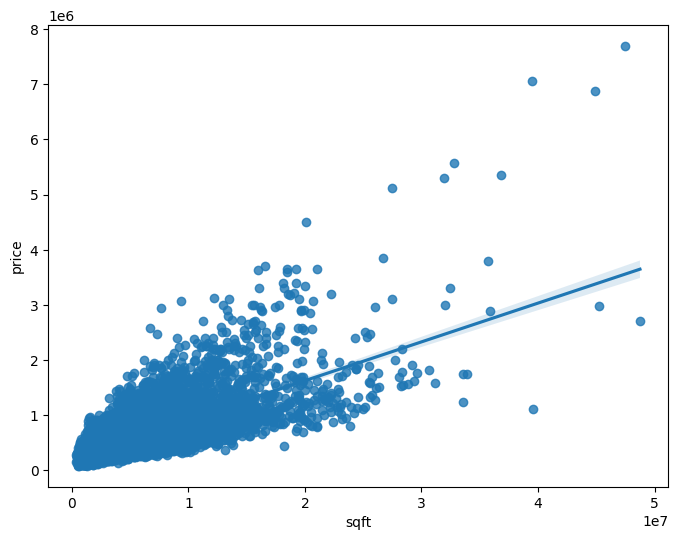

In [20]:
# 피처 엔지니어링
## sqft_ above,basement,living15,lot15 : 집의 면적을 특정 기준으로 구분해 놓은 변수들 / 15의 경우 재건축 여부에 따라 또 달라질 수 있다고함
## 이 변수들을 모두 합쳤을 때 price와의 상관관계가 존재하는지 확인 -> 그럴듯한 조합을 찾아 피처에 추가
## 해당 조합들을 변경해가면 실제로 실험해볼만하다고 생각
### basement의 경우 로그 변환 후에도 0에 값이 많이 몰려있으므로 삭제


sqft = (train['sqft_basement'] + train['sqft_above']) * train['sqft_living15']
sqft.name = "sqft"
data = pd.concat([train['price'], sqft], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft', y="price", data=data)

train['sqft'] = (train['sqft_basement'] + train['sqft_above']) * train['sqft_living15']
test['sqft'] = (test['sqft_basement'] + test['sqft_above']) * test['sqft_living15']



In [21]:
#피처 엔지니어링
zipcode_data = train.groupby('zipcode').aggregate(np.mean)

zipcode_ranks = {}
rank = 1
for idx, row in zipcode_data.sort_values(by='price').iterrows():
    zipcode_ranks[idx] = rank
    rank += 1

for data in [train, test]:
    zipcode_feature = []
    for idx, row in data.iterrows():
        zipcode_feature.append(zipcode_ranks[row.zipcode])
    data['zipcode_ranks'] = zipcode_feature

month = train.groupby('month').aggregate(np.mean)

month_ranks = {}
rank = 1
for idx, row in month.sort_values(by='price').iterrows():
    month_ranks[idx] = rank
    rank += 1

for data in [train, test]:
    month_feature = []
    for idx, row in data.iterrows():
        month_feature.append(month_ranks[row.month])
    data['month_rank'] = month_feature    


del train['month']
del test['month']
# zipcode, month별로 price의 평균을 내어 rank를 매겨준다 (집값이 낮으면 1 올라갈수록 +)

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

for data in [train, test]:
    coord = data[['lat','long']]
    pca_coord = PCA(n_components=2).fit(coord).transform(coord)
    data['pca1'] = pca_coord[:, 0]
    data['pca2'] = pca_coord[:, 1]

for data in [train, test]:
    
    data['term'] = -(data.year - data.yr_built)
    
# 위경도를 기준으로 사용하여 pca를 진행하여 새로운 변수를 만들어준다. 

In [23]:
#scaler의 경우 MinMaxScaler와 StandardScaler를 적용해보면서 비교
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import MinMaxScaler

X = train.drop('price', axis=1)
y = train['price']

scaler = MinMaxScaler()
scaler.fit_transform(X)

test_without_id = test.drop('id', axis=1)
scaler.transform(test_without_id)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [25]:
import eli5
perm = PermutationImportance(model, random_state = 42).fit(X_val, y_val)
eli5.show_weights(perm, top = 33, feature_names = X_val.columns.tolist())

Weight,Feature
0.1965 ± 0.0069,zipcode_ranks
0.1914 ± 0.0181,grade
0.1519 ± 0.0088,sqft_living
0.0523 ± 0.0065,lat
0.0512 ± 0.0085,sqft
0.0407 ± 0.0036,long
0.0379 ± 0.0043,pca1
0.0346 ± 0.0047,sqft_lot
0.0275 ± 0.0027,view
0.0153 ± 0.0007,waterfront


In [31]:
important_features = ['zipcode_ranks', 'grade', 'sqft_living', 'lat', 'sqft', 
                      'long', 'pca1', 'sqft_lot', 'view', 'waterfront', 
                      'sqft_above', 'pca2', 'yr_built', 'term', 'condition', 'bathrooms', 'zipcode', 'sqft_living15', 'sqft_lot15', 'year', 'yr_renovated', 'sqft_basement', 'floors',
                      'month_rank', 'bedrooms']

X_train = X_train[important_features]
X_val = X_val[important_features]

test_without_id = test_without_id[important_features]

In [32]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

models = {
    "RandomForest": RandomForestRegressor(random_state=42, n_estimators=300, max_depth=40),
    "LightGBM": LGBMRegressor(random_state=42, learning_rate=0.1, n_estimators=300, num_leaves=31),
    "XGBoost": xgb.XGBRegressor(random_state=42, learning_rate=0.1, n_estimators=300, max_depth=6)
}

In [33]:
from sklearn.metrics import mean_squared_error

# 모델 학습 및 검증
best_models = {}
preds = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f"{name} MSE: {mse}")
    preds.append(y_pred)
    best_models[name] = model

# 블렌딩
print("\nBlending Predictions...")
final_pred = np.mean(preds, axis=0)
final_mse = mean_squared_error(y_val, final_pred)
print(f"Final Blended Model MSE: {final_mse}")

Training RandomForest...
RandomForest MSE: 14806152918.04597
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3199
[LightGBM] [Info] Number of data points in the train set: 10521, number of used features: 25
[LightGBM] [Info] Start training from score 539893.561449
LightGBM MSE: 14272245685.90182
Training XGBoost...
XGBoost MSE: 12102663285.097525

Blending Predictions...
Final Blended Model MSE: 12177831591.098974


In [34]:
# 각 모델로 예측 후 평균
test_preds = []
for name, model in best_models.items():
    pred = model.predict(test_without_id)
    test_preds.append(pred)

final_test_pred = np.mean(test_preds, axis=0)

# # 예측값 로그 스케일 되돌리기
# final_test_pred = np.exp(final_test_pred)  # 로그 변환을 되돌리는 작업


submission = pd.DataFrame({'id': test['id'], 'price': final_test_pred})
submission.to_csv('./data/submission.csv', index=False)

In [30]:
submission.shape

(6468, 2)